# Project 01 (1)
### Name: Vaishnav Krishna P
### Data set is taken from Kaggle-competition
https://www.kaggle.com/competitions/spaceship-titanic/overview

## EDA (Exploratory Data analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.shape

(8693, 14)

## About the data set
1. passenger Id - unique id for each passenger 
2. Home planet - planet at which the passanger orginates 
3. cryosleep - "CryoSleep" refers to the option for passengers to undergo suspended animation or cryogenic sleep during a voyage.
4. cabin - - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - destination of passenger 
6. age - age of the passenger 
7. VIP - whether the passenger paid for special vip seiviec or not  
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name: First and Last name of the passenger 
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
+ The description you provided seems to be a fictional scenario or a creative context rather than a real-world situation. In this imaginative scenario, the term "transported" likely refers to the idea that passengers were somehow moved or shifted to another dimension or reality during the collision of the Spaceship Titanic with a spacetime anomaly.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Missing value analysis 

In [5]:
MissingValueFeatures = [features for features in df.columns if df[features].isnull().sum() > 0]
MissingValueFeatures

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [6]:
len(MissingValueFeatures)

12

In [7]:
# frequency of missing value in each features 
for feature in MissingValueFeatures:
    print("{}:Missing value percent {}% ".format(feature,100 * df[feature].isnull().mean()))

HomePlanet:Missing value percent 2.312205222592891% 
CryoSleep:Missing value percent 2.4962613597147127% 
Cabin:Missing value percent 2.289198205452663% 
Destination:Missing value percent 2.093638559760727% 
Age:Missing value percent 2.0591280340503855% 
VIP:Missing value percent 2.3352122397331185% 
RoomService:Missing value percent 2.082135051190613% 
FoodCourt:Missing value percent 2.105142068330841% 
ShoppingMall:Missing value percent 2.392729782583688% 
Spa:Missing value percent 2.105142068330841% 
VRDeck:Missing value percent 2.1626596111814105% 
Name:Missing value percent 2.300701714022777% 


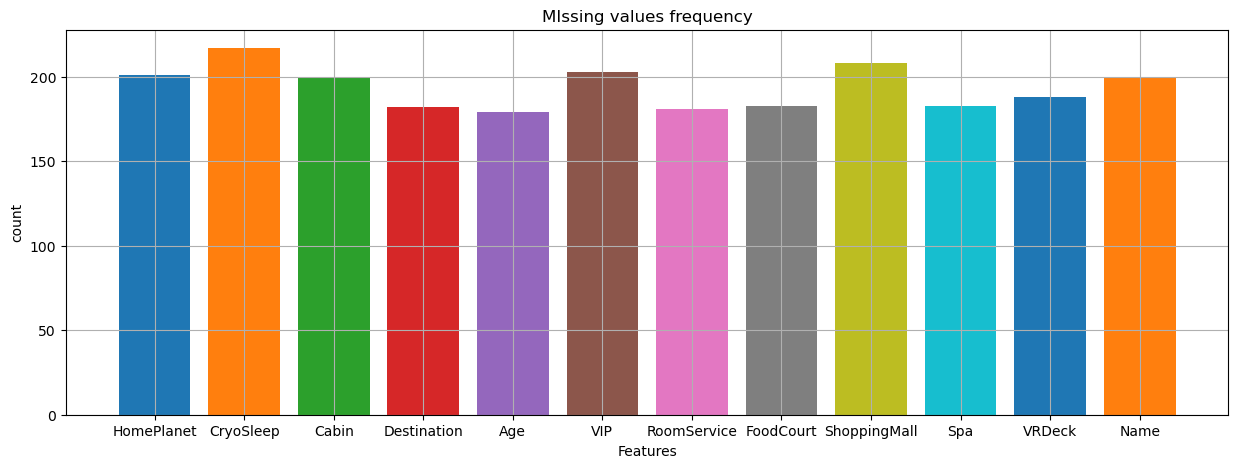

In [8]:
plt.figure(figsize=(15,5))
for feature in MissingValueFeatures:
    plt.bar(feature,df[feature].isnull().sum())
plt.xlabel("Features")
plt.ylabel("count")
plt.title("MIssing values frequency")
plt.grid(True)
plt.show()

## about Numerical Features

In [9]:
NumericalFeatures = [features for features in df.columns if df[features].dtype == 'float64']
NumericalFeatures

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [10]:
df[NumericalFeatures].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


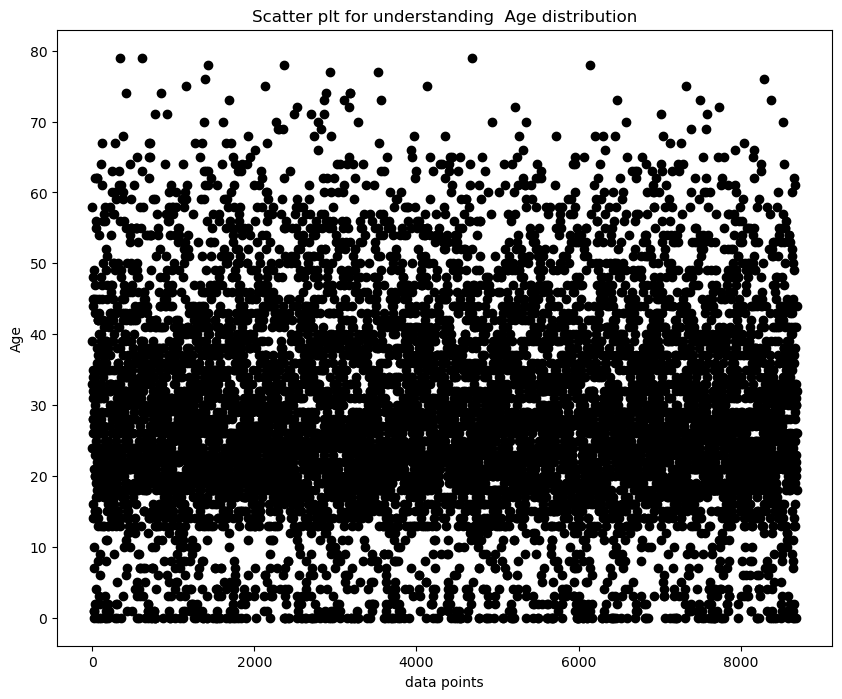

In [11]:
x = np.arange(1,df["Age"].shape[0]+1)
y = df["Age"]
plt.figure(figsize= (10,8))
plt.title("Scatter plt for understanding  Age distribution")
plt.xlabel("data points")
plt.ylabel("Age")
plt.scatter(x,y,color="k")
plt.show()

from scatter plt we understand one thing many of the passengers are in the range of 15-40 age group

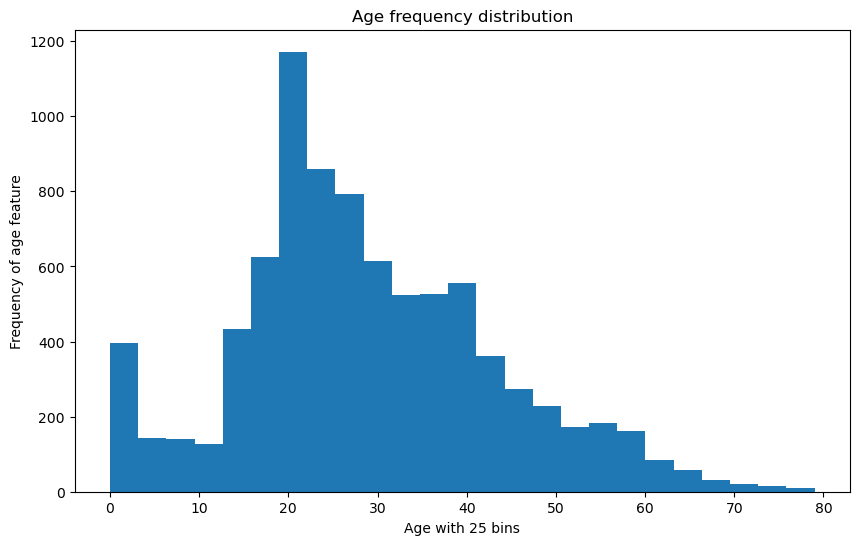

In [12]:
x = df["Age"]
plt.figure(figsize=(10,6))
plt.xlabel("Age with 25 bins")
plt.ylabel("Frequency of age feature")
plt.title("Age frequency distribution")
plt.hist(x,bins=25)
plt.show()

Age feature fololowed right skewed distribution.so we have to apply some transformation techniquies to make it normal distribution. Now we can move to other Numerical Features.

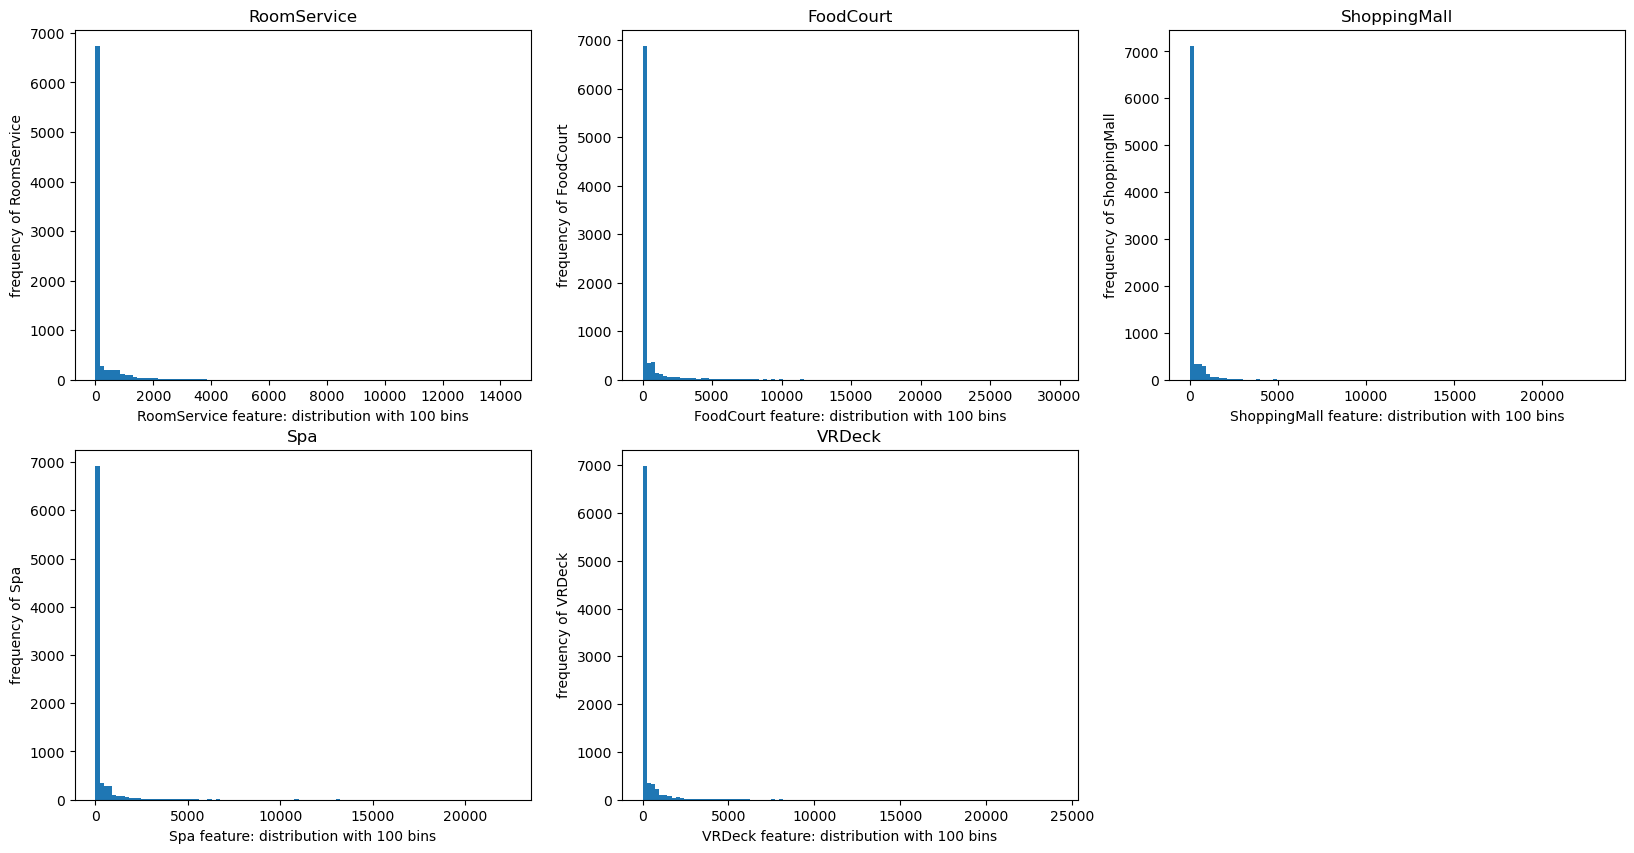

In [13]:
# checking the distribution of other Numerical features 
plt.figure(figsize=(20,10))
c = 1
for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    plt.subplot(2,3,c)
    c += 1
    plt.xlabel("{} feature: distribution with 100 bins".format(feature))
    plt.ylabel("frequency of {}".format(feature))
    plt.title(feature)
    plt.hist(df[feature],bins=100)
plt.show()

All the Numerical features are Right skewed(skewed to the positive axis).so, have to spply log normal distribution or other distribution to make to the Normal distribution

/Users/vyshnavkrishna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vyshnavkrishna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vyshnavkrishna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

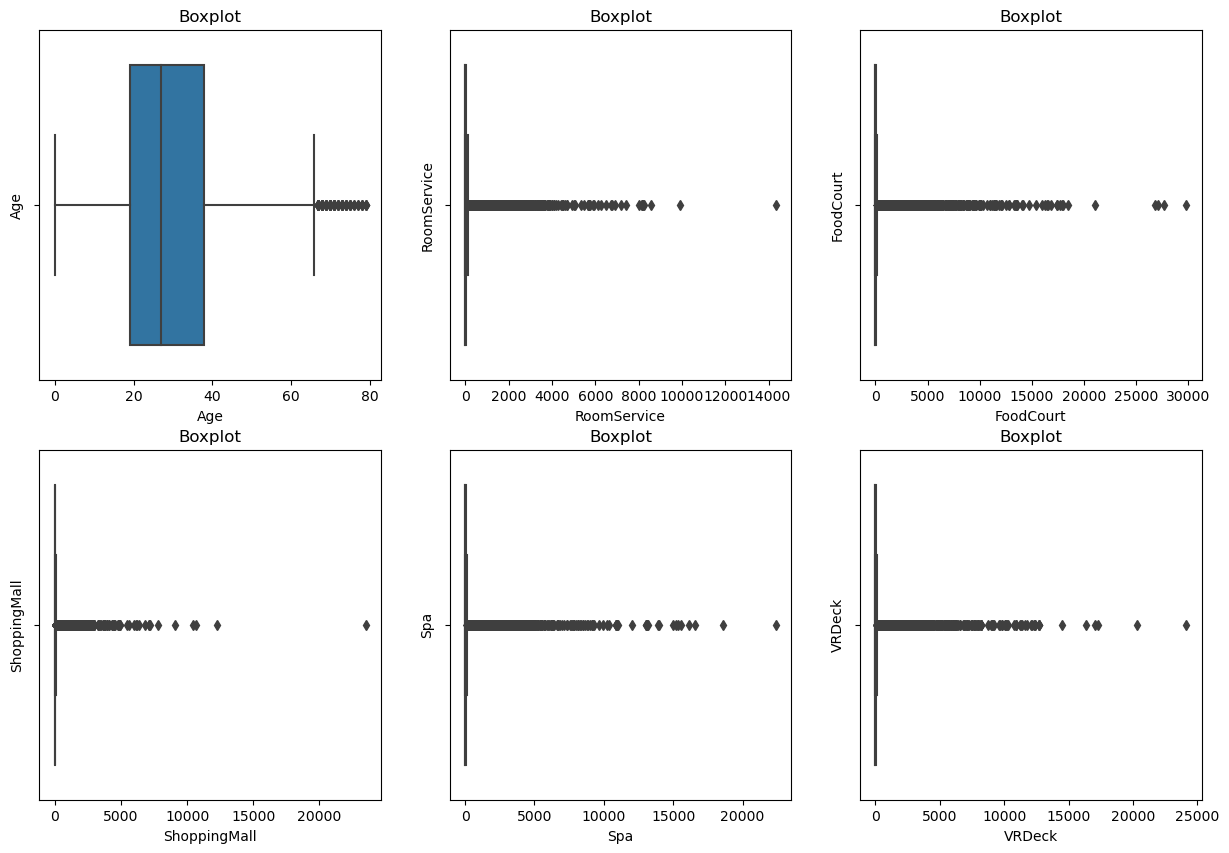

In [14]:
plt.figure(figsize=(15,10))
c = 1
for feature in NumericalFeatures:
    plt.subplot(2,3,c)
    c += 1
    plt.ylabel(feature)
    plt.title("Boxplot")
    sns.boxplot(df[feature])
plt.show()

according to the boxplot analysis.All the Numerical features have a large number of outliers.have to handle the outliers

## categorical feature

In [15]:
CategoricalFeatures = [features for features in df.columns if df[features].dtypes == 'O']
CategoricalFeatures

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [16]:
df[CategoricalFeatures].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [24]:
# no of categories 
for features in ["HomePlanet","CryoSleep","Destination","VIP"]:
    print("{}:no of categories = {}".format(features,len(df[features].unique())-1)) # not counted "nan"

HomePlanet:no of categories = 3
CryoSleep:no of categories = 2
Destination:no of categories = 3
VIP:no of categories = 2


In [25]:
# categories of categorical features
for features in ["HomePlanet","CryoSleep","Destination","VIP"]:
    print("{}:unique-categories {}".format(features,df[features].unique()))

HomePlanet:unique-categories ['Europa' 'Earth' 'Mars' nan]
CryoSleep:unique-categories [False True nan]
Destination:unique-categories ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP:unique-categories [False True nan]


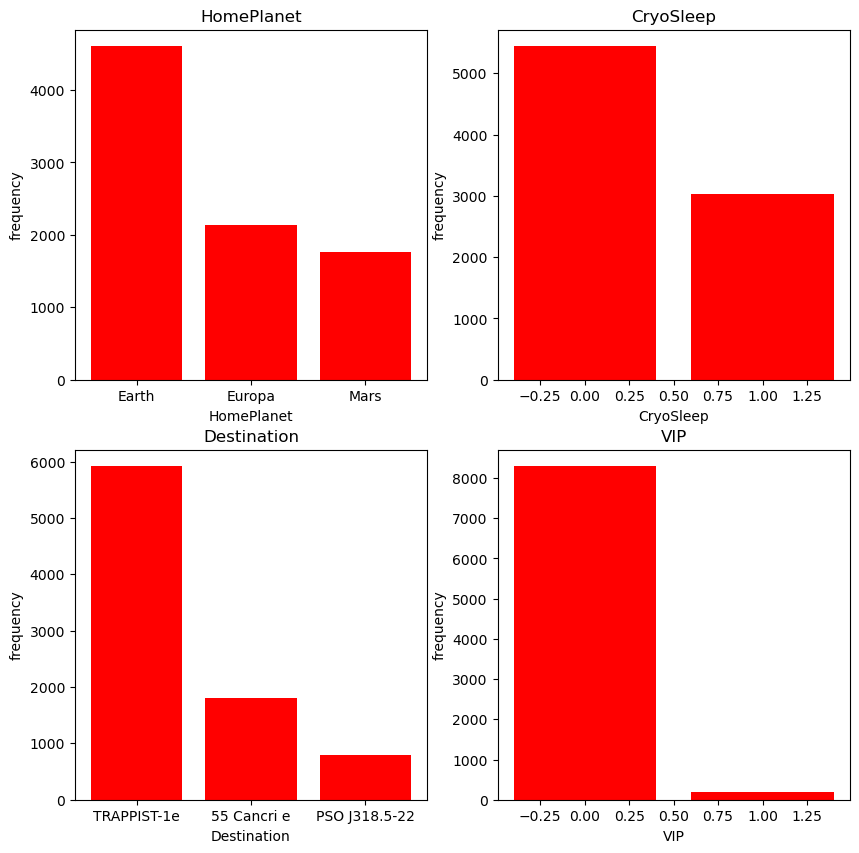

In [42]:
plt.figure(figsize=(10,10))
c = 1
for features in ["HomePlanet","CryoSleep","Destination","VIP"]:
    plt.subplot(2,2,c)
    c += 1
    x = df[features].value_counts().index
    y = df[features].value_counts().values
    plt.bar(x,y,color="r")
    plt.xlabel(features)
    plt.ylabel("frequency")
    plt.title(features)
    plt.grid(False)
plt.show()

So,categorical features are also not normaly distributed.so,have to perform some special operations on it 

## Target feature 

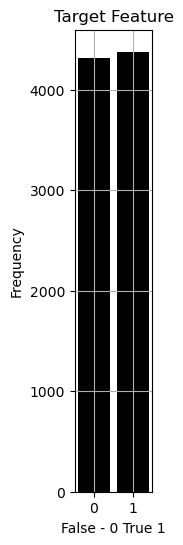

In [69]:
x = df["Transported"].value_counts().index
y = df["Transported"].value_counts().values
plt.figure(figsize=(1,6))
plt.title("Target Feature")
plt.xlabel("False - 0 True 1")
plt.ylabel("Frequency")
plt.bar(x,y,color="black")
plt.grid(True)
plt.show()

since,Target feature is a binary classification.almost similar count of yes and no